In [1]:
from citipy import citipy
import pandas as pd
import numpy as np
import json 
import requests
import gmaps
import matplotlib.pyplot as plt
from config import gkey
from config import api_key, API_KEY
import scipy.stats as st
from scipy.stats import linregress

In [2]:
points = pd.DataFrame({'lat': (np.random.uniform(-0.9,0.9,1500)*100), 'lon': (np.random.uniform(-1.8,1.8,1500)*100)})
points.head()

,lat,lon
0,-36.935382,-33.537824
1,-82.118094,-10.875271
2,-31.704823,0.327136
3,7.808021,92.232957
4,62.968927,-137.328448


In [3]:
cities = []
code = []
for i in range(0,len(points['lat'])):
    lat=points.iloc[i]['lat']
    lon=points.iloc[i]["lon"]
    
    city=citipy.nearest_city(lat,lon)
    name=city.city_name
    cities.append(name)
    country=city.country_code
    code.append(country)
    
        
points['City']=cities
points['Country']=code
points.head()

# Drop duplicate cities
points = points.drop_duplicates("City", keep='first')

print(f"There are {len(points)} cities left after dropping all duplicate values")

points.head()

There are 631 cities left after dropping all duplicate values


,lat,lon,City,Country
0,-36.935382,-33.537824,arraial do cabo,br
1,-82.118094,-10.875271,cape town,za
2,-31.704823,0.327136,luderitz,na
3,7.808021,92.232957,sabang,id
4,62.968927,-137.328448,mayo,ca


In [4]:
# Instantiate count of requests
count = 1

# Create empty lists to hold values for the data frame

mycity = []
country = []
lat = []
lon = []
temp = []
wind_speed = []
humidity = []
clouds = []
date = []





for point in points['City']:    
        
        
        print(f"..............................................")
        
        print(f"Retreiving weather and geo data for city id - {count} of Set 1 | {point}.")
        
        count = count + 1
        
        query_url = ("http://api.openweathermap.org/data/2.5/weather?"
                     'appid={0}&q={1}').format(API_KEY, point)
        try:
            # Initialize response
            response = requests.get(query_url).json()
            
            # Extract parameters             
            mycity.append(response['name'])
            country.append(response['sys']['country'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            wind_speed.append(response['wind']['speed'])
            clouds.append(response['clouds']['all'])
            date.append(response['dt'])
            
            
        except:
            print("City search returned null....skip city")

..............................................
Retreiving weather and geo data for city id - 1 of Set 1 | arraial do cabo.
..............................................
Retreiving weather and geo data for city id - 2 of Set 1 | cape town.
..............................................
Retreiving weather and geo data for city id - 3 of Set 1 | luderitz.
..............................................
Retreiving weather and geo data for city id - 4 of Set 1 | sabang.
..............................................
Retreiving weather and geo data for city id - 5 of Set 1 | mayo.
..............................................
Retreiving weather and geo data for city id - 6 of Set 1 | norman wells.
..............................................
Retreiving weather and geo data for city id - 7 of Set 1 | chimbote.
..............................................
Retreiving weather and geo data for city id - 8 of Set 1 | olafsvik.
..............................................
Retreiving weather 

..............................................
Retreiving weather and geo data for city id - 70 of Set 1 | porbandar.
..............................................
Retreiving weather and geo data for city id - 71 of Set 1 | nalut.
..............................................
Retreiving weather and geo data for city id - 72 of Set 1 | carnarvon.
..............................................
Retreiving weather and geo data for city id - 73 of Set 1 | butaritari.
..............................................
Retreiving weather and geo data for city id - 74 of Set 1 | muros.
..............................................
Retreiving weather and geo data for city id - 75 of Set 1 | hilo.
..............................................
Retreiving weather and geo data for city id - 76 of Set 1 | makung.
City search returned null....skip city
..............................................
Retreiving weather and geo data for city id - 77 of Set 1 | keffi.
....................................

..............................................
Retreiving weather and geo data for city id - 138 of Set 1 | brookings.
..............................................
Retreiving weather and geo data for city id - 139 of Set 1 | longyearbyen.
..............................................
Retreiving weather and geo data for city id - 140 of Set 1 | fare.
..............................................
Retreiving weather and geo data for city id - 141 of Set 1 | katsuura.
..............................................
Retreiving weather and geo data for city id - 142 of Set 1 | balabac.
..............................................
Retreiving weather and geo data for city id - 143 of Set 1 | mar del plata.
..............................................
Retreiving weather and geo data for city id - 144 of Set 1 | provideniya.
..............................................
Retreiving weather and geo data for city id - 145 of Set 1 | fereydun kenar.
..........................................

..............................................
Retreiving weather and geo data for city id - 205 of Set 1 | buchanan.
..............................................
Retreiving weather and geo data for city id - 206 of Set 1 | roald.
..............................................
Retreiving weather and geo data for city id - 207 of Set 1 | almaznyy.
..............................................
Retreiving weather and geo data for city id - 208 of Set 1 | cabo san lucas.
..............................................
Retreiving weather and geo data for city id - 209 of Set 1 | bambous virieux.
..............................................
Retreiving weather and geo data for city id - 210 of Set 1 | mount gambier.
..............................................
Retreiving weather and geo data for city id - 211 of Set 1 | kloulklubed.
..............................................
Retreiving weather and geo data for city id - 212 of Set 1 | nanortalik.
....................................

..............................................
Retreiving weather and geo data for city id - 274 of Set 1 | quelimane.
..............................................
Retreiving weather and geo data for city id - 275 of Set 1 | sinnamary.
..............................................
Retreiving weather and geo data for city id - 276 of Set 1 | wanxian.
..............................................
Retreiving weather and geo data for city id - 277 of Set 1 | mutsamudu.
City search returned null....skip city
..............................................
Retreiving weather and geo data for city id - 278 of Set 1 | talara.
..............................................
Retreiving weather and geo data for city id - 279 of Set 1 | kitgum.
..............................................
Retreiving weather and geo data for city id - 280 of Set 1 | barentsburg.
City search returned null....skip city
..............................................
Retreiving weather and geo data for city id - 28

..............................................
Retreiving weather and geo data for city id - 341 of Set 1 | skjervoy.
..............................................
Retreiving weather and geo data for city id - 342 of Set 1 | tiksi.
..............................................
Retreiving weather and geo data for city id - 343 of Set 1 | artyom.
..............................................
Retreiving weather and geo data for city id - 344 of Set 1 | gangotri.
City search returned null....skip city
..............................................
Retreiving weather and geo data for city id - 345 of Set 1 | bremervorde.
..............................................
Retreiving weather and geo data for city id - 346 of Set 1 | deniliquin.
..............................................
Retreiving weather and geo data for city id - 347 of Set 1 | tual.
..............................................
Retreiving weather and geo data for city id - 348 of Set 1 | maloy.
........................

..............................................
Retreiving weather and geo data for city id - 410 of Set 1 | baykit.
..............................................
Retreiving weather and geo data for city id - 411 of Set 1 | victoria.
..............................................
Retreiving weather and geo data for city id - 412 of Set 1 | rabo de peixe.
..............................................
Retreiving weather and geo data for city id - 413 of Set 1 | bokoro.
..............................................
Retreiving weather and geo data for city id - 414 of Set 1 | north bend.
..............................................
Retreiving weather and geo data for city id - 415 of Set 1 | bolotnoye.
..............................................
Retreiving weather and geo data for city id - 416 of Set 1 | ilulissat.
..............................................
Retreiving weather and geo data for city id - 417 of Set 1 | buraydah.
..............................................
Retr

..............................................
Retreiving weather and geo data for city id - 478 of Set 1 | hovd.
..............................................
Retreiving weather and geo data for city id - 479 of Set 1 | chute-aux-outardes.
..............................................
Retreiving weather and geo data for city id - 480 of Set 1 | progreso.
..............................................
Retreiving weather and geo data for city id - 481 of Set 1 | chitungwiza.
..............................................
Retreiving weather and geo data for city id - 482 of Set 1 | khani.
..............................................
Retreiving weather and geo data for city id - 483 of Set 1 | tondano.
..............................................
Retreiving weather and geo data for city id - 484 of Set 1 | sisimiut.
..............................................
Retreiving weather and geo data for city id - 485 of Set 1 | merauke.
..............................................
Retre

..............................................
Retreiving weather and geo data for city id - 546 of Set 1 | berbera.
..............................................
Retreiving weather and geo data for city id - 547 of Set 1 | pedasi.
..............................................
Retreiving weather and geo data for city id - 548 of Set 1 | calawag.
..............................................
Retreiving weather and geo data for city id - 549 of Set 1 | tumaco.
..............................................
Retreiving weather and geo data for city id - 550 of Set 1 | guisa.
..............................................
Retreiving weather and geo data for city id - 551 of Set 1 | kamenskoye.
City search returned null....skip city
..............................................
Retreiving weather and geo data for city id - 552 of Set 1 | verkhnyaya inta.
..............................................
Retreiving weather and geo data for city id - 553 of Set 1 | mehran.
...................

..............................................
Retreiving weather and geo data for city id - 615 of Set 1 | tabiauea.
City search returned null....skip city
..............................................
Retreiving weather and geo data for city id - 616 of Set 1 | peddapuram.
..............................................
Retreiving weather and geo data for city id - 617 of Set 1 | duverge.
..............................................
Retreiving weather and geo data for city id - 618 of Set 1 | candawaga.
City search returned null....skip city
..............................................
Retreiving weather and geo data for city id - 619 of Set 1 | imbituba.
..............................................
Retreiving weather and geo data for city id - 620 of Set 1 | mersing.
..............................................
Retreiving weather and geo data for city id - 621 of Set 1 | kihei.
..............................................
Retreiving weather and geo data for city id - 622 o

In [5]:
# Create data frame for the statistics generated 
data_df = pd.DataFrame({
                            "Latitude": lat,
                            "Longitude": lon,
                            "City": mycity,
                            "Country": country,
                            "Max Temp": temp,
                            "Humidity": humidity,
                            "Wind Speed": wind_speed,
                            "Cloudiness": clouds,
                            "Date": date
    
})

# write the dataframe to a csv
data_df.to_csv("weather_stats.csv", index = False)
data_df.head()

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-22.97,-42.03,Arraial do Cabo,BR,297.15,88,6.20,2,1601509997
1,-33.93,18.42,Cape Town,ZA,286.48,81,10.80,75,1601509880
2,-26.65,15.16,Lüderitz,NA,285.45,68,7.89,5,1601509997
3,5.89,95.32,Sabang,ID,300.80,72,1.02,23,1601509998
4,38.89,-76.51,Mayo,US,291.15,63,2.10,1,1601509998


In [46]:
# Load weather _stats
data = pd.read_csv('weather_stats.csv')
data.head()

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-22.97,-42.03,Arraial do Cabo,BR,297.15,88,6.20,2,1601509997
1,-33.93,18.42,Cape Town,ZA,286.48,81,10.80,75,1601509880
2,-26.65,15.16,Lüderitz,NaN,285.45,68,7.89,5,1601509997
3,5.89,95.32,Sabang,ID,300.80,72,1.02,23,1601509998
4,38.89,-76.51,Mayo,US,291.15,63,2.10,1,1601509998


In [27]:
# Convert Max Temp to fahrenheit
deg_f = [(9/5)*(t - 273) + 32 for t in data['Max Temp']]
data['Max Temp'] = deg_f
data.head()

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-22.97,-42.03,Arraial do Cabo,BR,75.470,88,6.20,2,1601509997
1,-33.93,18.42,Cape Town,ZA,56.264,81,10.80,75,1601509880
2,-26.65,15.16,Lüderitz,NaN,54.410,68,7.89,5,1601509997
3,5.89,95.32,Sabang,ID,82.040,72,1.02,23,1601509998
4,38.89,-76.51,Mayo,US,64.670,63,2.10,1,1601509998


In [47]:
# Check for max humidity
data['Humidity'].max()

100

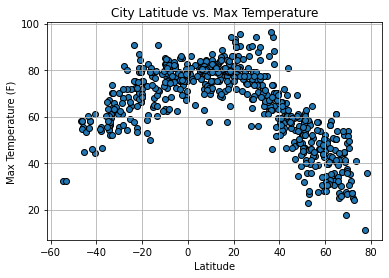

In [28]:
# Temperature vs Latitude

fig, ax = plt.subplots()


ax.scatter(data['Latitude'], data['Max Temp'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
ax.set_title('City Latitude vs. Max Temperature')
plt.grid()
fig.savefig('latitude_max_temp.png')
plt.show()

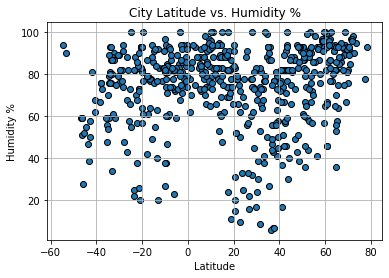

In [29]:
# Humidity vs Latitude 
fig, ax = plt.subplots()
ax.scatter(data['Latitude'], data['Humidity'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
ax.set_title('City Latitude vs. Humidity %')
plt.grid()
fig.savefig('latitude_humidity.png')
plt.show()

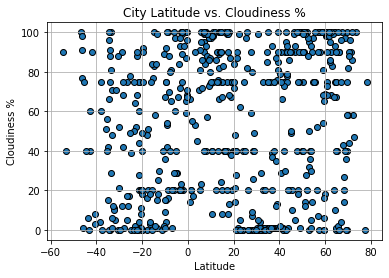

In [30]:
# Cloudiness vs Latitude
fig, ax = plt.subplots()
ax.scatter(data['Latitude'], data['Cloudiness'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
ax.set_title('City Latitude vs. Cloudiness %')
plt.grid()
fig.savefig('latitude_Cloudiness.png')
plt.show()

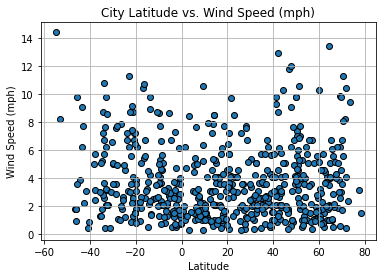

In [31]:
# Wind Speed vs Latitude
fig, ax = plt.subplots()
ax.scatter(data['Latitude'], data['Wind Speed'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
ax.set_title('City Latitude vs. Wind Speed (mph)')
plt.grid()
fig.savefig('latitude_wind_speed.png')
plt.show()

In [32]:
# Create data frame for all northern hemisphere cities
north_data = data.loc[data['Latitude'] >= 0]

In [33]:
north_data.head()

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
3,5.89,95.32,Sabang,ID,82.04,72,1.02,23,1601509998
4,38.89,-76.51,Mayo,US,64.67,63,2.10,1,1601509998
5,65.28,-126.83,Norman Wells,CA,53.87,58,6.70,40,1601509998
7,64.89,-23.71,Olafsvik,IS,40.55,70,4.04,67,1601509999
8,4.93,-52.33,Cayenne,GF,80.87,83,3.10,71,1601509999


The r-squared is: 0.7163678039917042
The equation of the line is: y = -0.74x + 90.26


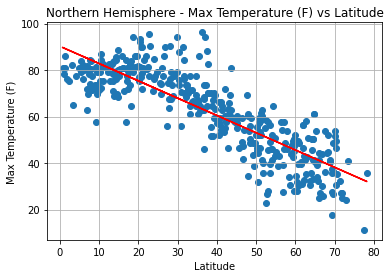

In [34]:
# North Temperature vs Latitude
x_values = north_data['Latitude']
y_values = north_data['Max Temp']

# Linear regression on Temperature and latitude relatioship
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temperature (F) vs Latitude')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")

plt.grid()
fig.savefig('north_latitude_max_temp.png')
plt.show()

The r-squared is: 0.01721128129608155
The equation of the line is: y = 0.13x + 70.64


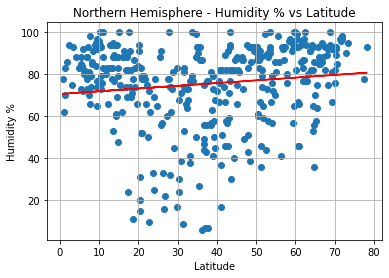

In [35]:
# North Humidity vs Latitude
x_values = north_data['Latitude']
y_values = north_data['Humidity']

# Linear regression on Temperature and latitude relatioship
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere - Humidity % vs Latitude')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")

plt.grid()
fig.savefig('north_latitude_humidity.png')
plt.show()

The r-squared is: 0.000944157868863752
The equation of the line is: y = 0.06x + 55.36


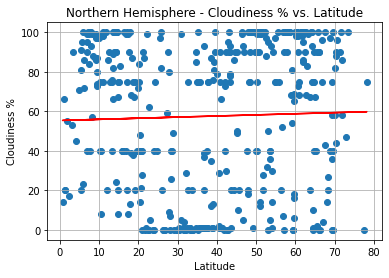

In [36]:
# North Cloudiness vs Latitude
x_values = north_data['Latitude']
y_values = north_data['Cloudiness']

# Linear regression on Temperature and latitude relatioship
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Northern Hemisphere - Cloudiness % vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")

plt.grid()
fig.savefig('north_latitude_cloud.png')
plt.show()

The r-squared is: 0.014614850188217765
The equation of the line is: y = 0.01x + 2.92


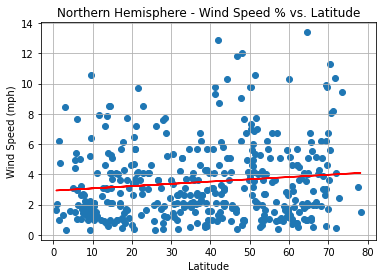

In [37]:
# North Wind Speed vs Latitude
x_values = north_data['Latitude']
y_values = north_data['Wind Speed']

# Linear regression on Temperature and latitude relatioship
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed % vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")

plt.grid()
fig.savefig('north_latitude_wind_speed.png')
plt.show()

In [38]:
# Create data frame for all southern hemisphere cities
south_data = data.loc[data['Latitude'] <= 0]

In [40]:
south_data.head()

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-22.97,-42.03,Arraial do Cabo,BR,75.470,88,6.20,2,1601509997
1,-33.93,18.42,Cape Town,ZA,56.264,81,10.80,75,1601509880
2,-26.65,15.16,Lüderitz,NaN,54.410,68,7.89,5,1601509997
6,-9.09,-78.58,Chimbote,PE,62.420,85,3.65,42,1601509999
10,-9.43,159.95,Honiara,SB,77.270,94,4.10,75,1601510000


The r-squared is: 0.5120143193673851
The equation of the line is: y = 0.59x + 80.9


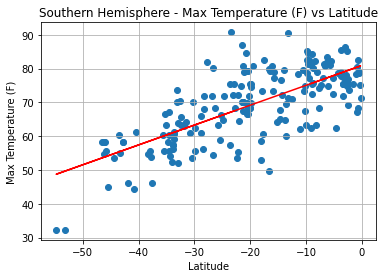

In [41]:
# South Temperature vs Latitude
x_values = south_data['Latitude']
y_values = south_data['Max Temp']

# Linear regression on Temperature and latitude relatioship
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temperature (F) vs Latitude')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")

plt.grid()
fig.savefig('south_latitude_max_temp.png')
plt.show()

The r-squared is: 0.05038100575060963
The equation of the line is: y = 0.31x + 79.8


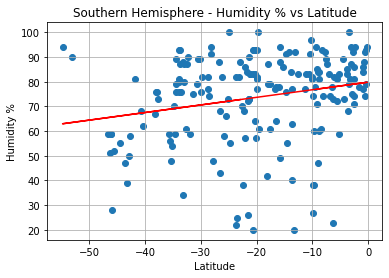

In [42]:
# South Humidity vs Latitude
x_values = south_data['Latitude']
y_values = south_data['Humidity']

# Linear regression on Temperature and latitude relatioship
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere - Humidity % vs Latitude')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")

plt.grid()
fig.savefig('south_latitude_humidity.png')
plt.show()

The r-squared is: 0.01774128907760311
The equation of the line is: y = 0.35x + 53.85


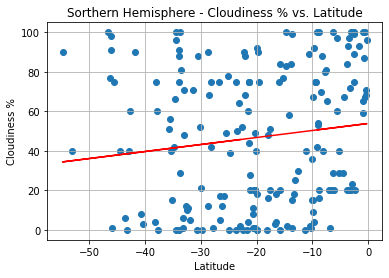

In [43]:
# South Cloudiness vs Latitude
x_values = south_data['Latitude']
y_values = south_data['Cloudiness']

# Linear regression on Temperature and latitude relatioship
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Sorthern Hemisphere - Cloudiness % vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")

plt.grid()
fig.savefig('south_latitude_cloud.png')
plt.show()

The r-squared is: 0.05162043003771497
The equation of the line is: y = -0.05x + 3.02


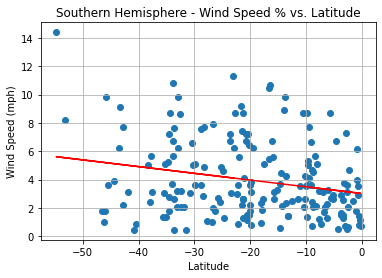

In [44]:
# South Wind Speed vs Latitude
x_values = south_data['Latitude']
y_values = south_data['Wind Speed']

# Linear regression on Temperature and latitude relatioship
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed % vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")

plt.grid()
fig.savefig('south_latitude_wind_speed.png')
plt.show()